# 0. Install and Import Dependencies

In [108]:
!pip install mediapipe opencv-python pandas scikit-learn keras tensorflow tflite

In [8]:
import mediapipe as mp
import cv2

In [9]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

# 1. Make Some Detections

In [7]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [8]:
results.face_landmarks.landmark[0].visibility

0.0

# 2. Capture Landmarks & Export to CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [10]:
import csv
import os
import numpy as np

In [10]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [11]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [12]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [13]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [72]:
class_name = "Pain"

In [73]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('coords.csv')

In [16]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.494561,0.629883,-1.055178,0.999964,0.526246,0.568696,-0.995372,0.999930,0.543050,...,-0.012576,0.0,0.564623,0.564677,0.008720,0.0,0.569697,0.559780,0.009374,0.0
1,Happy,0.496609,0.634543,-1.013193,0.999943,0.528843,0.573003,-0.948786,0.999888,0.545678,...,-0.010062,0.0,0.565026,0.562567,0.011578,0.0,0.569848,0.558903,0.012221,0.0
2,Happy,0.497161,0.636443,-1.018678,0.999920,0.529438,0.574684,-0.955003,0.999847,0.546307,...,-0.011356,0.0,0.564090,0.562123,0.009436,0.0,0.569010,0.558785,0.009918,0.0
3,Happy,0.497139,0.639510,-1.040067,0.999881,0.529429,0.576933,-0.971950,0.999787,0.546302,...,-0.011725,0.0,0.563264,0.562449,0.009120,0.0,0.568140,0.559012,0.009602,0.0
4,Happy,0.496975,0.639019,-1.101477,0.999852,0.529271,0.576253,-1.027935,0.999740,0.546171,...,-0.011144,0.0,0.562521,0.562701,0.009787,0.0,0.567392,0.559183,0.010291,0.0


In [17]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
4213,Pain,0.625913,0.073043,-0.585752,0.999295,0.647979,0.030780,-0.546690,0.999082,0.662428,...,-0.000576,0.0,0.672963,0.029102,0.015902,0.0,0.676614,0.023945,0.016633,0.0
4214,Pain,0.626505,0.070397,-0.584991,0.999360,0.649704,0.028590,-0.547872,0.999164,0.664751,...,-0.000196,0.0,0.682690,0.025097,0.018364,0.0,0.686516,0.020381,0.019334,0.0
4215,Pain,0.644129,0.056613,-0.542262,0.999380,0.663778,0.023275,-0.507565,0.999171,0.677024,...,0.001027,0.0,0.707994,-0.001245,0.017850,0.0,0.712147,-0.007975,0.018739,0.0
4216,Pain,0.668426,0.046801,-0.556816,0.999397,0.685114,0.012571,-0.521768,0.999165,0.697218,...,0.002208,0.0,0.721362,-0.007535,0.022521,0.0,0.725310,-0.013851,0.023906,0.0
4217,Pain,0.676839,0.040569,-0.553019,0.999391,0.691499,0.009030,-0.519370,0.999116,0.703343,...,0.002835,0.0,0.730978,-0.015813,0.023860,0.0,0.735165,-0.021699,0.025202,0.0


In [78]:
df[df['class']=='Sad']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
542,Sad,0.488484,0.626194,-0.805227,0.999965,0.521179,0.567260,-0.749725,0.999913,0.539034,...,-0.003121,0.0,0.555681,0.560882,0.023273,0.0,0.560688,0.556035,0.024310,0.0
543,Sad,0.485024,0.628707,-0.909506,0.999952,0.516005,0.567540,-0.847320,0.999888,0.533780,...,-0.004222,0.0,0.548035,0.562400,0.021244,0.0,0.553111,0.557692,0.022179,0.0
544,Sad,0.481665,0.629282,-0.905353,0.999940,0.512642,0.567530,-0.843626,0.999862,0.530525,...,-0.004116,0.0,0.545288,0.561721,0.021342,0.0,0.550385,0.557264,0.022259,0.0
545,Sad,0.473665,0.629666,-0.941813,0.999926,0.503766,0.567250,-0.883020,0.999840,0.522324,...,-0.004316,0.0,0.539540,0.560835,0.020438,0.0,0.544497,0.557021,0.021202,0.0
546,Sad,0.471774,0.631647,-0.962860,0.999904,0.501157,0.567385,-0.899101,0.999801,0.519776,...,-0.003737,0.0,0.537242,0.560419,0.021292,0.0,0.542195,0.556752,0.022069,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Sad,0.408424,0.760444,-1.765299,0.997130,0.451284,0.671501,-1.732478,0.997550,0.473581,...,-0.036483,0.0,0.497404,0.669046,-0.017883,0.0,0.503710,0.660127,-0.018144,0.0
892,Sad,0.407833,0.757609,-1.673067,0.997244,0.450543,0.668807,-1.630430,0.997649,0.472954,...,-0.035326,0.0,0.495009,0.664736,-0.016783,0.0,0.501252,0.656103,-0.017102,0.0
893,Sad,0.404387,0.755189,-1.673713,0.997319,0.446949,0.666562,-1.628195,0.997719,0.469375,...,-0.034984,0.0,0.491432,0.654330,-0.016761,0.0,0.497629,0.645556,-0.017094,0.0
894,Sad,0.400639,0.743621,-1.533301,0.997383,0.443768,0.653592,-1.481999,0.997776,0.465875,...,-0.035665,0.0,0.488928,0.645551,-0.017285,0.0,0.494716,0.638876,-0.017876,0.0


In [79]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [81]:
y_test

2148    Surprised
2556      Excited
1830      Tension
961         Angry
3542         Pain
          ...    
551           Sad
2555      Excited
3623         Pain
4120         Pain
1517      Tension
Name: class, Length: 1266, dtype: object

## 3.2 Train Machine Learning Classification Model

In [19]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [87]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [88]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [89]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=5000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [90]:
fit_models['rc'].predict(X_test)

array(['Surprised', 'Excited', 'Tension', ..., 'Pain', 'Pain', 'Tension'],
      dtype='<U9')

## 3.3 Evaluate and Serialize Model 

In [18]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [92]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.995260663507109
rc 0.985781990521327
rf 0.9881516587677726
gb 0.9928909952606635


In [93]:
fit_models['rf'].predict(X_test)

array(['Surprised', 'Excited', 'Tension', ..., 'Pain', 'Pain', 'Tension'],
      dtype=object)

In [94]:
y_test

2148    Surprised
2556      Excited
1830      Tension
961         Angry
3542         Pain
          ...    
551           Sad
2555      Excited
3623         Pain
4120         Pain
1517      Tension
Name: class, Length: 1266, dtype: object

In [95]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 4. Make Detections with Model

In [20]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [21]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [22]:
import warnings
cap = cv2.VideoCapture(0)

emotions = []
warnings.filterwarnings('ignore')

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            emotions.append(str(body_language_class))
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Happy [0.   0.01 0.   0.05 0.53 0.   0.16 0.25 0.  ]
Happy [0.08 0.02 0.   0.1  0.31 0.   0.15 0.29 0.05]
Happy [0.09 0.03 0.   0.08 0.33 0.   0.15 0.24 0.08]
Happy [0.1  0.03 0.   0.08 0.33 0.   0.17 0.2  0.09]
Happy [0.02 0.03 0.   0.07 0.53 0.   0.12 0.23 0.  ]
Happy [0.02 0.03 0.   0.06 0.57 0.   0.14 0.18 0.  ]
Happy [0.01 0.03 0.   0.06 0.56 0.   0.12 0.22 0.  ]
Happy [0.05 0.03 0.   0.06 0.55 0.   0.12 0.19 0.  ]
Happy [0.06 0.01 0.   0.08 0.48 0.   0.14 0.19 0.04]
Happy [0.07 0.02 0.   0.07 0.46 0.01 0.15 0.17 0.05]
Happy [0.02 0.02 0.   0.04 0.59 0.   0.11 0.22 0.  ]
Happy [0.   0.07 0.02 0.05 0.59 0.01 0.11 0.11 0.04]
Happy [0.   0.05 0.   0.02 0.81 0.   0.05 0.05 0.02]
Happy [0.01 0.03 0.   0.03 0.87 0.   0.03 0.03 0.  ]
Happy [0.01 0.03 0.   0.03 0.81 0.   0.04 0.07 0.01]
Happy [0.01 0.02 0.   0.03 0.82 0.   0.02 0.09 0.01]
Happy [0.01 0.01 0.   0.08 0.74 0.   0.06 0.09 0.01]
Happy [0.02 0.01 0.   0.07 0.72 0.01 0.11 0.06 0.  ]
Happy [0.02 0.01 0.   0.06 0.8  0.   0.06 0.03

Angry [0.42 0.02 0.01 0.07 0.   0.01 0.12 0.13 0.22]
Tension [0.29 0.02 0.01 0.03 0.01 0.   0.14 0.16 0.34]
Surprised [0.06 0.04 0.02 0.01 0.04 0.   0.13 0.45 0.25]
Angry [0.29 0.02 0.01 0.02 0.01 0.   0.2  0.23 0.22]
Tension [0.24 0.03 0.01 0.02 0.04 0.   0.2  0.19 0.27]
Surprised [0.06 0.02 0.03 0.01 0.04 0.   0.18 0.47 0.19]
Surprised [0.06 0.03 0.01 0.02 0.12 0.   0.12 0.5  0.14]
Surprised [0.09 0.02 0.01 0.02 0.12 0.   0.12 0.49 0.13]
Happy [0.04 0.06 0.   0.04 0.37 0.01 0.17 0.26 0.05]
Happy [0.03 0.14 0.03 0.03 0.27 0.02 0.26 0.18 0.04]
Happy [0.04 0.14 0.03 0.04 0.27 0.02 0.2  0.24 0.02]
Happy [0.03 0.16 0.03 0.03 0.31 0.01 0.26 0.14 0.03]
Happy [0.03 0.14 0.02 0.03 0.31 0.02 0.22 0.19 0.04]
Sad [0.03 0.18 0.02 0.05 0.22 0.01 0.31 0.15 0.03]
Sad [0.01 0.22 0.06 0.07 0.12 0.03 0.41 0.05 0.03]
Sad [0.01 0.24 0.07 0.07 0.11 0.04 0.43 0.02 0.01]
Sad [0.01 0.19 0.03 0.08 0.15 0.02 0.35 0.15 0.02]
Sad [0.03 0.13 0.03 0.05 0.19 0.03 0.36 0.16 0.02]
Sad [0.03 0.13 0.03 0.03 0.2  0.01 0

Tension [0.24 0.01 0.01 0.11 0.02 0.01 0.13 0.15 0.32]
Tension [0.08 0.   0.   0.12 0.06 0.   0.11 0.31 0.32]
Surprised [0.13 0.01 0.   0.11 0.15 0.   0.09 0.3  0.21]
Surprised [0.13 0.01 0.   0.17 0.11 0.   0.05 0.37 0.16]
Tension [0.17 0.   0.02 0.14 0.05 0.01 0.1  0.25 0.26]
Surprised [0.11 0.01 0.02 0.16 0.08 0.01 0.07 0.33 0.21]
Surprised [0.13 0.01 0.01 0.12 0.09 0.01 0.08 0.34 0.21]
Surprised [0.19 0.   0.   0.14 0.05 0.01 0.11 0.29 0.21]
Surprised [0.09 0.   0.   0.19 0.12 0.   0.06 0.42 0.12]
Surprised [0.1  0.   0.   0.19 0.07 0.   0.06 0.43 0.15]
Surprised [0.12 0.   0.01 0.14 0.07 0.   0.08 0.37 0.21]
Surprised [0.13 0.   0.01 0.14 0.08 0.01 0.07 0.39 0.17]
Surprised [0.11 0.01 0.01 0.16 0.08 0.   0.06 0.48 0.09]
Surprised [0.04 0.   0.   0.18 0.17 0.   0.06 0.53 0.02]
Surprised [0.11 0.   0.   0.17 0.09 0.   0.04 0.51 0.08]
Surprised [0.11 0.01 0.01 0.22 0.13 0.   0.04 0.38 0.1 ]
Surprised [0.05 0.   0.   0.23 0.21 0.   0.03 0.42 0.06]
Surprised [0.23 0.   0.01 0.18 0.06 0

Tension [0.32 0.04 0.05 0.16 0.   0.02 0.01 0.07 0.33]
Tension [0.29 0.04 0.05 0.18 0.   0.02 0.01 0.08 0.33]
Angry [0.37 0.04 0.03 0.16 0.   0.02 0.02 0.05 0.31]
Angry [0.37 0.04 0.04 0.16 0.   0.02 0.01 0.06 0.3 ]
Tension [0.29 0.03 0.04 0.16 0.   0.02 0.02 0.04 0.4 ]
Tension [0.34 0.03 0.03 0.12 0.01 0.02 0.   0.06 0.39]
Tension [0.29 0.02 0.02 0.13 0.01 0.01 0.02 0.05 0.45]
Tension [0.29 0.01 0.02 0.18 0.01 0.01 0.02 0.04 0.42]
Tension [0.29 0.02 0.03 0.17 0.01 0.02 0.01 0.07 0.38]
Tension [0.33 0.02 0.05 0.15 0.01 0.01 0.01 0.04 0.38]
Tension [0.32 0.04 0.06 0.16 0.01 0.01 0.   0.06 0.34]
Tension [0.31 0.03 0.05 0.16 0.01 0.01 0.   0.06 0.37]
Tension [0.29 0.03 0.04 0.16 0.01 0.01 0.01 0.07 0.38]
Tension [0.28 0.03 0.05 0.15 0.01 0.02 0.01 0.08 0.37]
Tension [0.3  0.04 0.06 0.15 0.01 0.02 0.01 0.08 0.33]
Tension [0.31 0.04 0.06 0.15 0.01 0.01 0.01 0.08 0.33]
Angry [0.34 0.03 0.1  0.12 0.   0.02 0.   0.06 0.33]
Angry [0.34 0.05 0.09 0.11 0.   0.01 0.   0.08 0.32]
Tension [0.32 0.06

Angry [0.36 0.07 0.12 0.03 0.03 0.01 0.05 0.09 0.24]
Angry [0.35 0.08 0.14 0.03 0.03 0.01 0.04 0.09 0.23]
Angry [0.27 0.05 0.04 0.04 0.06 0.01 0.08 0.21 0.24]
Angry [0.3  0.06 0.03 0.04 0.06 0.02 0.07 0.18 0.24]
Angry [0.28 0.05 0.03 0.03 0.09 0.01 0.08 0.16 0.27]
Angry [0.36 0.02 0.02 0.03 0.04 0.02 0.14 0.14 0.23]
Surprised [0.17 0.02 0.   0.05 0.08 0.01 0.07 0.48 0.12]
Surprised [0.15 0.01 0.01 0.06 0.1  0.   0.07 0.51 0.09]
Surprised [0.   0.02 0.02 0.03 0.29 0.01 0.08 0.54 0.01]
Happy [0.04 0.   0.01 0.05 0.44 0.01 0.1  0.31 0.04]
Happy [0.1  0.   0.   0.1  0.41 0.01 0.08 0.21 0.09]
Happy [0.08 0.01 0.   0.13 0.37 0.02 0.07 0.2  0.12]


# 5. Emotion Graph

## 5.1 Pie plot

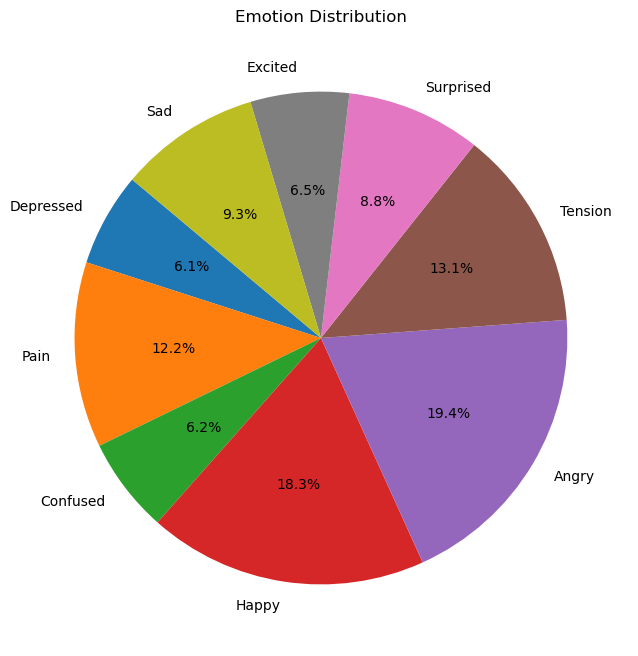

In [40]:
import matplotlib.pyplot as plt

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.show()


## 5.2 Bar plot

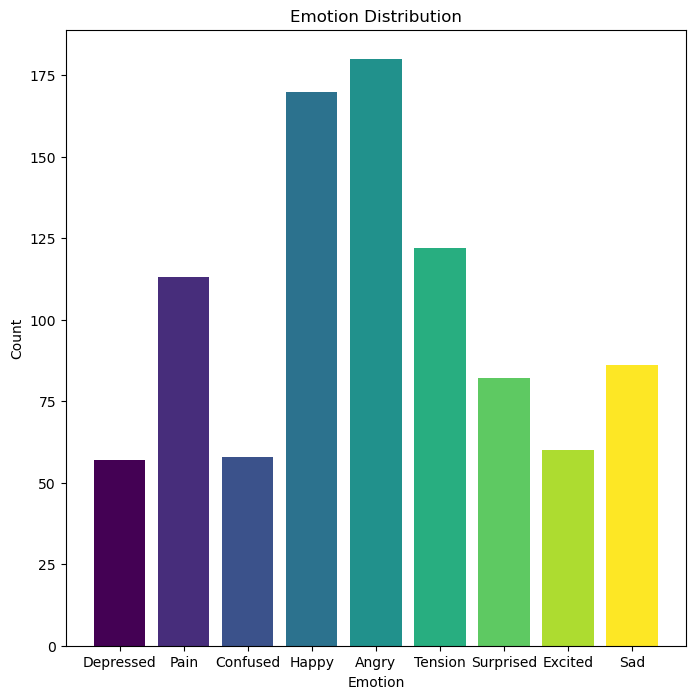

In [71]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Define a colormap
cmap = plt.get_cmap("viridis")

plt.figure(figsize=(8, 8))
plt.bar(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), width=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

## 5.3 Horizontal bar plot

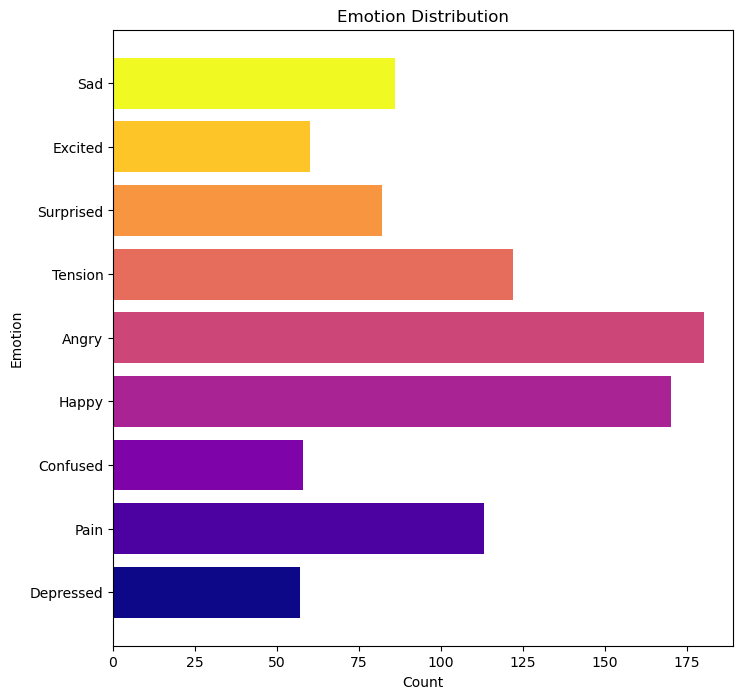

In [64]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Define a colormap
cmap = plt.get_cmap("plasma")

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), height=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

## 5.4 Horizontal bar plot in creasing order of sizes

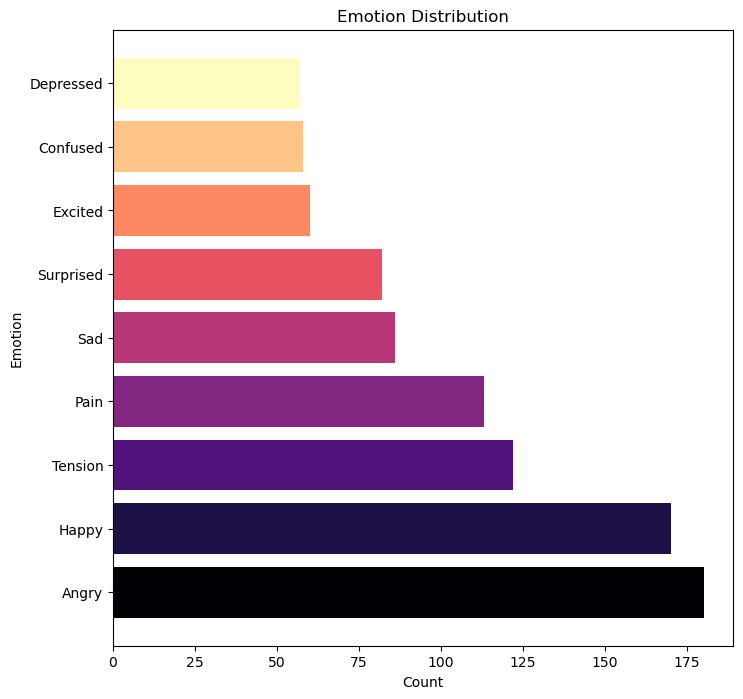

In [73]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Sort labels and sizes in decreasing order of sizes
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

# Define a colormap
cmap = plt.get_cmap("magma")

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), height=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

## 5.5 Horizontal bar plot with increasing order of sizes

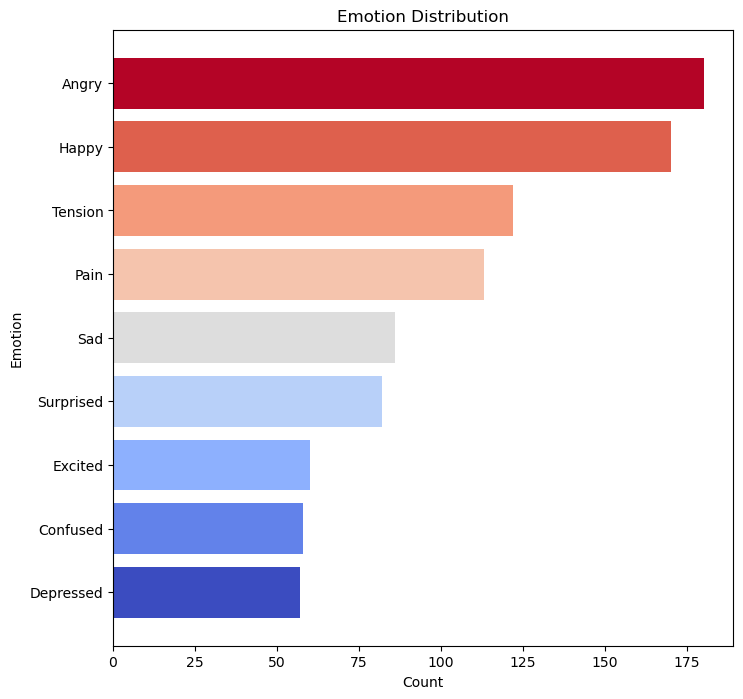

In [50]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Sort labels and sizes in increasing order of sizes
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1]))

# Generate a color gradient
start_color = 'blue'
end_color = 'red'
num_bars = len(labels)
colors = plt.cm.get_cmap('coolwarm', num_bars)

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=colors(np.arange(num_bars)))
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

In [17]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(404, 186)

# 6. Tensorflow-lite Model

## 6.1 Train Machine Learning Classification Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('coords.csv')

X = df.drop('class', axis=1) # features
y = df['class'] # target value

# Convert string labels to numerical labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Build a simple model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax') # number of classes is determined by unique values in y
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("body_language.tflite", "wb").write(tflite_model)

# 7. Make Detections with Model

In [23]:
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='body_language.tflite')
interpreter.allocate_tensors()

In [24]:
import warnings
cap = cv2.VideoCapture(0)

emotions = []
warnings.filterwarnings('ignore')

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            emotions.append(str(body_language_class))
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Happy [0.01 0.03 0.01 0.05 0.33 0.   0.21 0.3  0.06]
Happy [0.   0.06 0.02 0.03 0.39 0.   0.25 0.2  0.05]
Sad [0.01 0.06 0.03 0.04 0.26 0.   0.3  0.25 0.05]
Sad [0.01 0.05 0.03 0.04 0.29 0.   0.3  0.23 0.05]
Happy [0.01 0.05 0.02 0.02 0.37 0.   0.24 0.24 0.05]
Happy [0.01 0.06 0.03 0.03 0.32 0.   0.26 0.24 0.05]
Happy [0.01 0.05 0.03 0.05 0.31 0.   0.29 0.21 0.05]
Happy [0.01 0.06 0.02 0.04 0.39 0.   0.25 0.19 0.04]
Happy [0.   0.05 0.02 0.04 0.48 0.   0.19 0.17 0.05]
Happy [0.01 0.02 0.01 0.03 0.72 0.01 0.04 0.16 0.  ]
Happy [0.   0.01 0.   0.03 0.73 0.   0.14 0.08 0.01]
Sad [0.   0.06 0.   0.07 0.25 0.02 0.41 0.17 0.02]
Happy [0.   0.   0.02 0.03 0.63 0.01 0.17 0.11 0.03]
Happy [0.   0.02 0.   0.07 0.65 0.   0.08 0.13 0.05]
Happy [0.   0.   0.   0.08 0.62 0.   0.1  0.13 0.07]
Happy [0.01 0.02 0.   0.09 0.48 0.   0.07 0.22 0.11]
Happy [0.01 0.01 0.   0.12 0.53 0.   0.11 0.12 0.1 ]
Happy [0.01 0.   0.   0.13 0.54 0.   0.1  0.09 0.13]
Happy [0.02 0.01 0.   0.15 0.51 0.   0.09 0.1  0.12]

Sad [0.   0.04 0.01 0.03 0.26 0.   0.46 0.19 0.01]
Sad [0.   0.04 0.02 0.03 0.28 0.   0.4  0.2  0.03]
Sad [0.01 0.07 0.03 0.09 0.21 0.   0.38 0.19 0.02]
Sad [0.02 0.05 0.02 0.23 0.14 0.01 0.4  0.08 0.05]
Sad [0.02 0.04 0.02 0.08 0.2  0.01 0.37 0.2  0.06]
Sad [0.01 0.07 0.02 0.19 0.19 0.   0.36 0.13 0.03]
Sad [0.03 0.06 0.02 0.26 0.16 0.01 0.34 0.07 0.05]
Sad [0.01 0.08 0.01 0.31 0.1  0.01 0.4  0.02 0.06]
Sad [0.02 0.08 0.01 0.31 0.1  0.01 0.39 0.03 0.05]
Sad [0.02 0.09 0.01 0.27 0.09 0.01 0.42 0.02 0.07]
Sad [0.02 0.1  0.01 0.27 0.08 0.01 0.42 0.03 0.06]
Sad [0.02 0.09 0.02 0.27 0.09 0.02 0.41 0.02 0.06]
Sad [0.03 0.09 0.01 0.26 0.12 0.01 0.4  0.02 0.06]
Sad [0.   0.09 0.01 0.31 0.1  0.02 0.39 0.02 0.06]
Sad [0.02 0.11 0.02 0.24 0.08 0.02 0.39 0.04 0.08]
Sad [0.01 0.1  0.04 0.24 0.08 0.02 0.38 0.04 0.09]
Sad [0.01 0.1  0.02 0.24 0.08 0.02 0.41 0.04 0.08]
Sad [0.01 0.07 0.02 0.28 0.09 0.02 0.41 0.04 0.06]
Sad [0.   0.11 0.   0.23 0.08 0.03 0.44 0.04 0.07]
Surprised [0.01 0.02 0.   0.06 

Sad [0.   0.18 0.04 0.09 0.15 0.   0.35 0.12 0.07]
Sad [0.   0.16 0.04 0.04 0.24 0.02 0.3  0.15 0.05]
Confused [0.   0.32 0.08 0.07 0.1  0.02 0.28 0.02 0.11]
Happy [0.   0.06 0.01 0.03 0.42 0.01 0.12 0.33 0.02]
Surprised [0.02 0.02 0.   0.04 0.39 0.03 0.07 0.41 0.02]
Happy [0.01 0.04 0.03 0.02 0.61 0.03 0.03 0.23 0.  ]
Happy [0.04 0.05 0.   0.02 0.41 0.04 0.07 0.27 0.1 ]
Happy [0.03 0.06 0.01 0.02 0.39 0.03 0.03 0.39 0.04]
Happy [0.01 0.04 0.02 0.02 0.51 0.03 0.02 0.34 0.01]
Happy [0.01 0.06 0.02 0.02 0.47 0.03 0.02 0.35 0.02]
Happy [0.03 0.05 0.02 0.01 0.43 0.02 0.02 0.41 0.01]
Happy [0.01 0.03 0.02 0.01 0.69 0.03 0.02 0.19 0.  ]
Happy [0.02 0.06 0.02 0.02 0.56 0.03 0.08 0.21 0.  ]
Happy [0.02 0.19 0.02 0.01 0.43 0.03 0.15 0.12 0.03]
Happy [0.02 0.31 0.   0.01 0.34 0.03 0.16 0.11 0.02]
Happy [0.03 0.23 0.   0.01 0.43 0.03 0.12 0.15 0.  ]
Confused [0.   0.59 0.   0.   0.26 0.   0.09 0.05 0.01]
Confused [0.   0.66 0.   0.   0.23 0.   0.06 0.02 0.03]
Happy [0.03 0.27 0.01 0.   0.38 0.02 

Tension [0.28 0.02 0.05 0.16 0.01 0.04 0.02 0.09 0.33]
Tension [0.28 0.02 0.05 0.19 0.   0.04 0.04 0.07 0.31]
Tension [0.28 0.02 0.05 0.19 0.   0.02 0.03 0.1  0.31]
Tension [0.29 0.02 0.05 0.17 0.01 0.02 0.02 0.09 0.33]
Tension [0.28 0.02 0.04 0.18 0.01 0.02 0.01 0.1  0.34]
Angry [0.33 0.01 0.05 0.12 0.02 0.02 0.01 0.14 0.3 ]
Angry [0.35 0.01 0.05 0.11 0.02 0.02 0.02 0.14 0.28]
Angry [0.32 0.01 0.05 0.15 0.02 0.02 0.02 0.13 0.28]
Angry [0.29 0.01 0.07 0.19 0.01 0.03 0.01 0.12 0.27]
Tension [0.26 0.02 0.05 0.18 0.01 0.04 0.02 0.13 0.29]
Tension [0.25 0.02 0.05 0.18 0.01 0.05 0.02 0.12 0.3 ]
Tension [0.26 0.02 0.05 0.18 0.01 0.04 0.02 0.12 0.3 ]
Tension [0.24 0.02 0.04 0.17 0.01 0.05 0.02 0.12 0.33]
Tension [0.23 0.02 0.04 0.19 0.01 0.05 0.02 0.12 0.32]
Tension [0.27 0.02 0.06 0.23 0.01 0.03 0.02 0.08 0.28]
Angry [0.3  0.01 0.05 0.18 0.01 0.03 0.02 0.12 0.28]
Tension [0.27 0.01 0.05 0.18 0.01 0.04 0.01 0.13 0.3 ]
Tension [0.29 0.01 0.05 0.17 0.01 0.03 0.02 0.12 0.3 ]
Angry [0.29 0.01 0.0

# 8. Emotion Graph

## 8.1 Pie plot

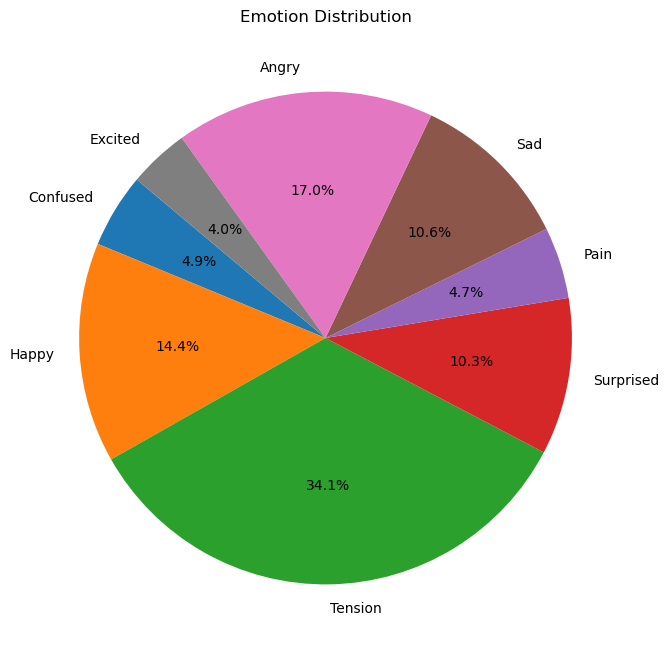

In [30]:
import matplotlib.pyplot as plt

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.show()


## 8.2 Bar plot

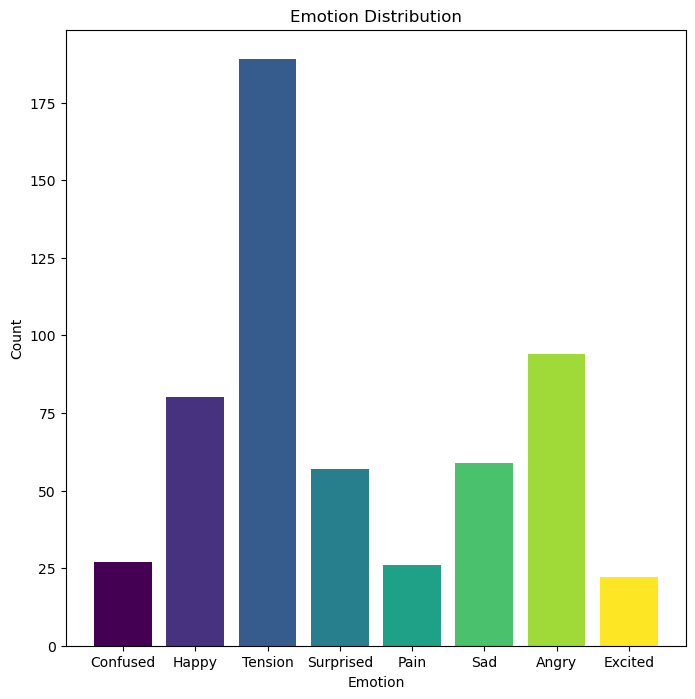

In [26]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Define a colormap
cmap = plt.get_cmap("viridis")

plt.figure(figsize=(8, 8))
plt.bar(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), width=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

## 8.3 Horizontal bar plot

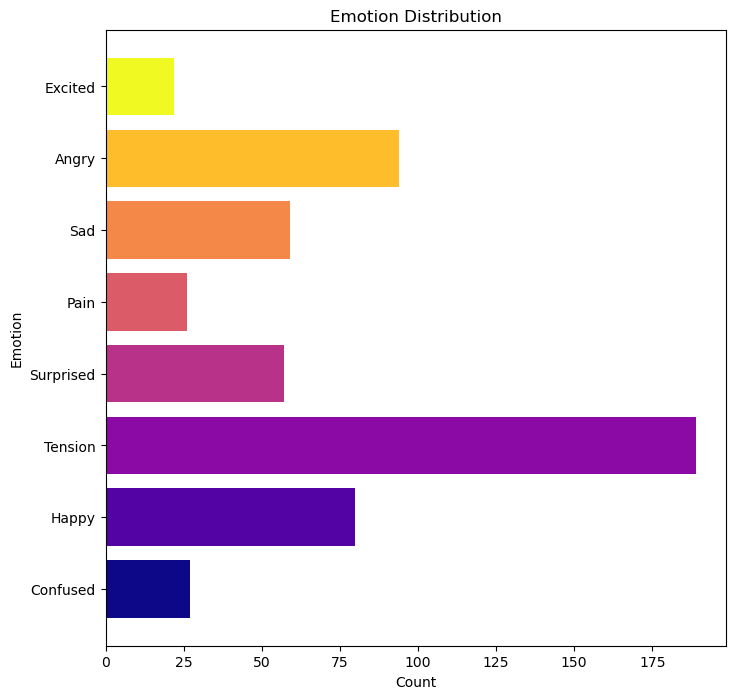

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Define a colormap
cmap = plt.get_cmap("plasma")

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), height=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

## 8.4 Horizontal bar plot in creasing order of sizes

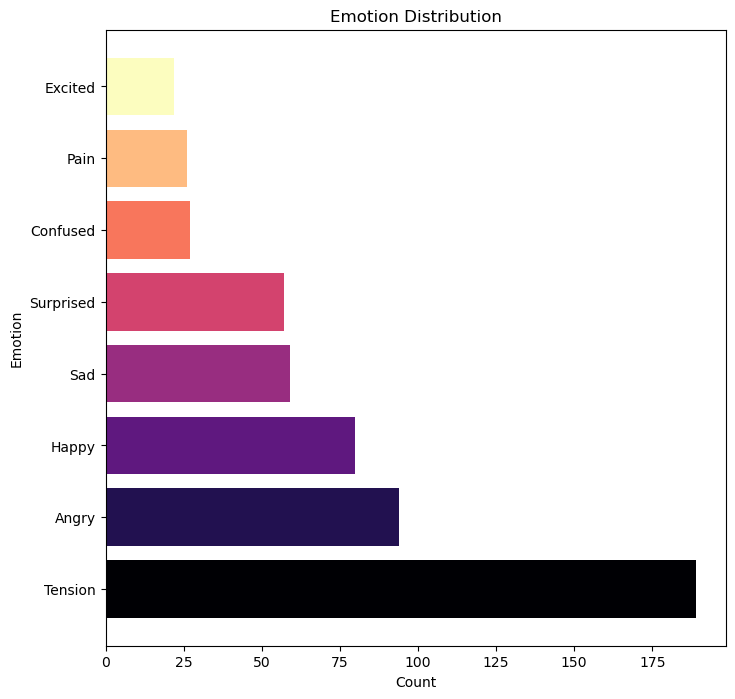

In [28]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Sort labels and sizes in decreasing order of sizes
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))

# Define a colormap
cmap = plt.get_cmap("magma")

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=cmap(np.linspace(0, 1, len(labels))), height=0.8)
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

##  8.5 Horizontal bar plot with increasing order of sizes

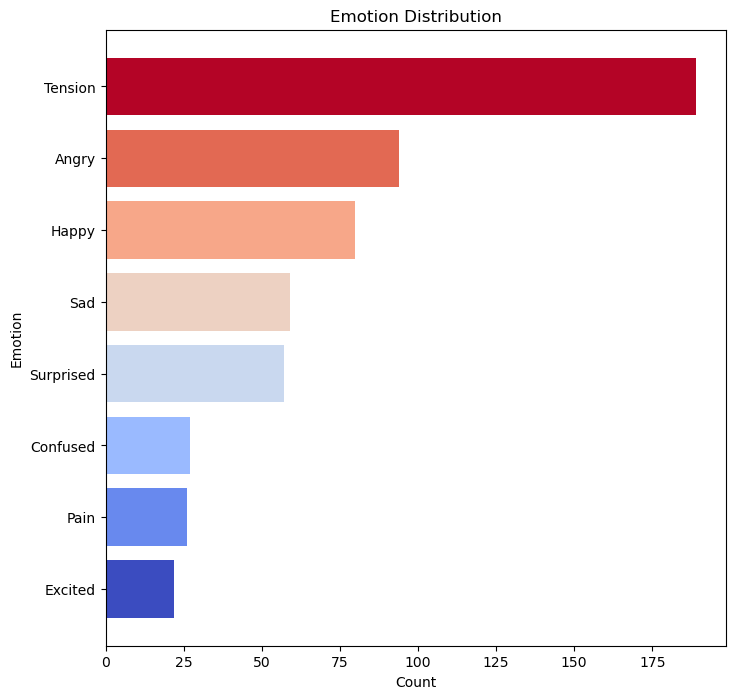

In [29]:
import matplotlib.pyplot as plt
import numpy as np

data = emotions

counts = {value: data.count(value) for value in set(data)}
labels = list(counts.keys())
sizes = list(counts.values())

# Sort labels and sizes in increasing order of sizes
labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1]))

# Generate a color gradient
start_color = 'blue'
end_color = 'red'
num_bars = len(labels)
colors = plt.cm.get_cmap('coolwarm', num_bars)

plt.figure(figsize=(8, 8))
plt.barh(labels, sizes, color=colors(np.arange(num_bars)))
plt.title('Emotion Distribution')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

In [31]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(424, 144)